# 02. MACHINE LEARNING

1. Introduction
2. Gradient descent
3. Neural networks
4. Backpropagation
5. Exercise
6. References

# 1. Introduction to machine learning

- $X$ is a set of objects
- $Y$ is a set of answers
- $y^∗: X \rightarrow Y$ is an objective function. Its values $y_i = y^∗(x_i)$ are known only for a finite subset of objects $\{ x_1, ..., x_l\} \subseteq X$
 
The set of pairs $X_l = \{(x_i, y_i) | i \in \{1, ..., l\} \}$ is called the *training set*.

#### Problem

The task is to reconstruct the function $y^∗$ using the training set $X_l$.

That is, we must construct a function $y: X \rightarrow Y$ that approximates the objective function $y^∗(x)$ not only on the training set but also on the entire set $X$.

![](./res/02_learning_scheme.jpg)

#### Optimization

How can we construct the function $y: X \rightarrow Y$?

A common strategy is to define an optimization problem:
1.  Define a _loss function_ $L(\hat{y}, y)$, a non-negative function that measures the discrepancy between a predicted answer $\hat{y}$ and the true answer $y$. If $L(\hat{y}, y) = 0$, the prediction is _correct_.
2.  The overall goal is to find a function that minimizes the cumulative loss across the entire training set.


This is typically formalized as follows:
1.  We choose a _hypothesis space_ $A$, which is a set of candidate functions $f: X \rightarrow Y$.
2.  The functions in $A$ are often parameterized: $A = \{f(a) \mid a \in D\}$, where $D$ is a set of admissible parameters.
3.  We then select the specific function $f \in A$ that minimizes the total loss on the training data $X_l$. Ideally, this function will also perform well (have a low loss) on the entire set $X$.

Example: In linear regression, we use the hypothesis space of linear functions (e.g., lines $y = kx + b$, and a common loss function is the squared error.

![](./res/02_linear_regression.jpg)

The process of optimizing the function $y$ can be visualized as a descent across the landscape of the loss function.

![https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png](https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png)

Thus, we have an *optimization problem*.

#### How will we know that the training was successful?

1. _Loss Value_: Monitoring the value of the loss function on the training data, which quantifies the model's training error.
2. _Hold-Out Validation_: Testing the model on a separate, unseen hold-out dataset (or validation set) to estimate its generalization error and check for overfitting.

![](./res/02_learning.jpg)

#### Optimization methods

What optimization methods do you know?

- differentiable functions
- continuous functions
- discontinuous functions

If we compare optimization of differentiable and discontinuous functions, which is easier and why?

#### Optimization Methods

**What are the primary classes of optimization methods?**

Optimization methods are often categorized by the properties of the function being optimized:

1. _Differentiable Functions_: Functions where gradients can be computed.
   - Methods: Gradient Descent, Conjugate Gradient, Quasi-Newton methods
3. _Continuous but Non-Differentiable Functions_: Functions that are continuous but may have kinks or corners where the gradient is undefined.
   - Methods: Subgradient methods, Nelder-Mead algorithm.
4. _Discontinuous or Combinatorial Functions_: Functions defined over discrete spaces or with jumps.
    - Methods: Genetic algorithms, simulated annealing, swarm optimization.

**Comparison: Differentiable vs. Discontinuous Optimization**

Optimizing differentiable functions is generally 
- much easier and
- more efficient.

The reason is the existence of the _gradient_, which provides a definitive local direction of steepest descent. This allows for powerful, guided, and fast-converging algorithms.

In contrast, optimizing discontinuous functions often requires heuristic methods that explore the search space more randomly, without such a reliable guide, making them slower and less guaranteed to find a global optimum.

# 2. Gradient descent

For many machine learning problems, the function we aim to optimize is _differentiable_.
This property allows us to use a powerful and intuitive optimization algorithm called _gradient descent_.

The core idea is simple: to minimize a function, repeatedly take small steps in the direction of the steepest descent, which is the negative of its gradient. The gradient of a function $f(x)$, denoted $\frac{df}{dx}$ for a single variable, is defined as the limit:

$$\frac{df}{dx} = \lim_{h \rightarrow 0} \frac{f(x+h) -f (x)}{h}$$

![](./res/02_gradient_descent_1.jpeg)

[Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools]

#### Are there any disadvantages to gradient descent?

![](./res/02_gradient_descent_2.jpeg)

[Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools]

# 3. Neural networks

![](./res/02_neural_network_human_cortex.png)

[Cortex neurons (Ramón y Cajal)]

#### Single neuron model

![](https://www.researchgate.net/publication/374679637/figure/fig2/AS:11431281206265945@1700629912758/Neural-network-architecture.png)

or

![](./res/02_neuron_math.jpg)

[Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools]

#### Neural network

![](./res/02_neural_network_math.jpg)

[Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools]

#### The universality of neural networks

Nonlinearity

![](./res/02_nonlinearity.jpg)

Cybenko's theorem

![](./res/02_cybenko_1.png)
![](./res/02_cybenko_2.png)

#### PyTorch

[AlexNet](https://proceedings.neurips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), scheme:

![](./res/02_alexnet.png)

AlexNet, code in PyTorch:

![](./res/02_alexnet_code.png)

# 4. Backpropagation

#### How to optimize

Suppose we want to optimize a loss function using gradient descent.

1. We have a loss function $L$ that we want to minimize.
2. We have model parameters that we can change.
3. if we take the parameter $w$, then $\frac{dL}{dw}$ contains information about how the value of the loss function $L$ will change for a small change in the parameter $w$.

Suppose $y = g(x)$ and $z = f (g(x)) = f (y)$.
Then $$\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}.$$

#### Problem

Let's take a slightly more complex situation: $x = f(w)$, $y = f(x)$, $z = f(y)$.
Then
$$\frac{dz}{dw} = \frac{dz}{dy} \frac{dy}{dx} \frac{dx}{dw} =$$
$$= f'(y) f'(x) f'(w) =$$
$$= f'(f(f(w))) f'(f(w)) f'(w).$$

The expression $f(w)$ is used multiple times. We have two options:
1.  Calculate it once, save the result, and reuse it.
2.  Recalculate it every time it is needed.

#### Solution

The solution to this problem of efficient computation is the _Backpropagation Algorithm_.

The method was first described in 1974 by A. I. Galushkin, and also independently and simultaneously by Paul J. Werbos

![](./res/02_learning_process.jpg)

#### [karpathy/micrograd](https://github.com/karpathy/micrograd)

In [1]:
from micrograd.engine import Value
from graphviz import Digraph

In [2]:
# utilities

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{data %.2f | grad %.2f}" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

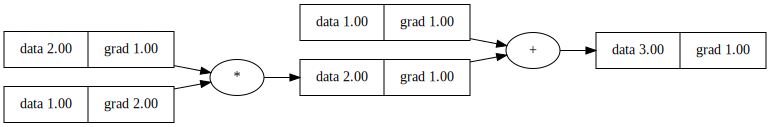

In [3]:
x = Value(1.0); x.label = 'x'
#y = (x * 2 + 1).relu()
y = x * 2 + 1
y.backward()
draw_dot(y)

https://github.com/karpathy/micrograd/blob/master/micrograd/engine.py

![](./res/02_micrograd_value.png)

### PyTorch

![](./res/02_computation_graph_pytorch_1.jpg)

`loss.backward()`

![](./res/02_computation_graph_pytorch_2.jpg)

[Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools]

# 5. Exercise

Implement the operation hyperbolic tangent $\tanh(x)$ as a method of the [Value](https://github.com/karpathy/micrograd/blob/c911406e5ace8742e5841a7e0df113ecb5d54685/micrograd/engine.py#L2) class.

To test it, you need to build a computational graph, run backpropagation, and visualize it ([example](https://github.com/karpathy/micrograd/blob/master/trace_graph.ipynb)).

[Example](https://github.com/karpathy/micrograd/blob/c911406e5ace8742e5841a7e0df113ecb5d54685/micrograd/engine.py#L13) for the addition operation.
Additional [explanations](https://www.youtube.com/watch?v=VMj-3S1tku0).

# 6. References

1. [Goodfellow et al - Deep learning](https://www.deeplearningbook.org/)
2. [Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools](https://www.manning.com/books/deep-learning-with-pytorch)
3. [Karpathy - Neural Networks: Zero to Hero](https://github.com/karpathy/nn-zero-to-hero/tree/master)
4. [Zhang et al - Dive into Deep Learning](https://d2l.ai/)
5. [Karpathy - The spelled-out intro to neural networks and backpropagation: building micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0)
6. [Clarkson - LLM from scratch: Automatic Differentiation](https://bclarkson-code.com/posts/llm-from-scratch-scalar-autograd/post.html)
7. [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
8. [Ramón y Cajal and the Case for Drawing in Science](https://www.scientificamerican.com/blog/sa-visual/ramon-y-cajal-and-the-case-for-drawing-in-science2/) 